# E-news Express Project

## Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.



## Objective: 

* Explore the dataset and extract insights using Exploratory Data Analysis.
* <a href = #link1>Do the users spend more time on the new landing page than the old landing page?</a>
* <a href = #link2>Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?</a>
* <a href = #link3>Does the converted status depend on the preferred language?</a>
* <a href = #link4>Is the mean time spent on the new page same for the different language users?</a>


## Data:
1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats # library for statistical analysis 
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
data=pd.read_csv("abtest.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
news=data.copy()

### View the first and last 5 rows of the dataset.

In [4]:
news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Check the shape of the dataset.

In [6]:
news.shape

(100, 6)

* Dataset has 100 rows and 6 columns.

### Check the data types of the columns for the dataset.

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**
* All columns have 100 observations consistent with the shape, thus no missing value
* group, landing_page, converted and language_preferred are object data type
* time_spent_on_the_page is of float data type

## Fixing the data types
* group, landing_page, converted and language_preferred are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [8]:
news["group"]=news["group"].astype("category")
news["landing_page"]=news["landing_page"].astype("category")
news["converted"]=news["converted"].astype("category")
news["language_preferred"]=news["language_preferred"].astype("category")

In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


* group, landing_page, converted and language_preferred have been converted to categories

`we can also see that the memory usage has decreased from 4.8+ KB to 2.5KB`

### Give a statistical summary for the dataset.

In [10]:
news.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* time_spent_on_the_page has approximately same mean and median. This could suggest that the distribution is almost normal
* user_id is not relevant here

In [11]:
news.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,treatment,old,yes,Spanish
freq,50,50,54,34


* There are two groups of users with equal split of 50
* There are also two landing_page types with equal amount of users
* There are more converted users (54) than those not converted 
* Spanish(34) is the most preferred langauge out of the three language types

### Check for missing values

In [12]:
news.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the data.

## Exploratory Data Analysis (EDA)

### Univariate analysis

### Observations on Time spent on the page

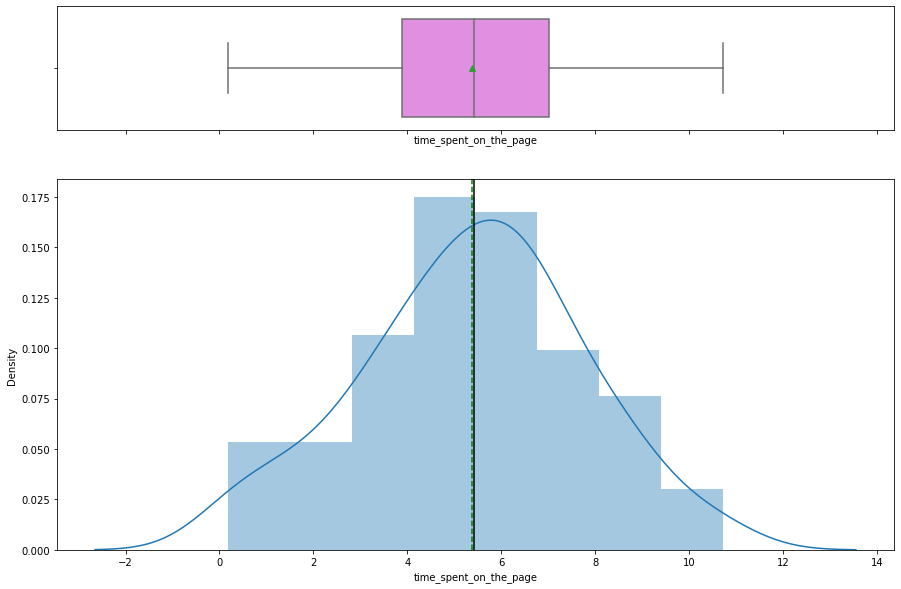

In [79]:
# Below code helps plot the Boxplot and distribution plot of the Time spent on the landing page

f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = (15,10) 
                                           ) # creating the 2 subplots
sns.boxplot(news['time_spent_on_the_page'], ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
sns.distplot(news['time_spent_on_the_page'], kde=True, ax=ax_hist2) # For histogram
ax_hist2.axvline(np.mean(news['time_spent_on_the_page']), color='green', linestyle='--') # Add mean to the histogram
ax_hist2.axvline(np.median(news['time_spent_on_the_page']), color='black', linestyle='-') # Add median to the histogram

plt.savefig('time',dpi=300,bbox_inches='tight')

In [72]:
news.quantile(q=0.75)

user_id                   546567.2500
time_spent_on_the_page         7.0225
Name: 0.75, dtype: float64

* Time spent on the landing has a normal distribution
* Thus the time spent sample data can help predict the population time spent

In [85]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 

### Observations on group

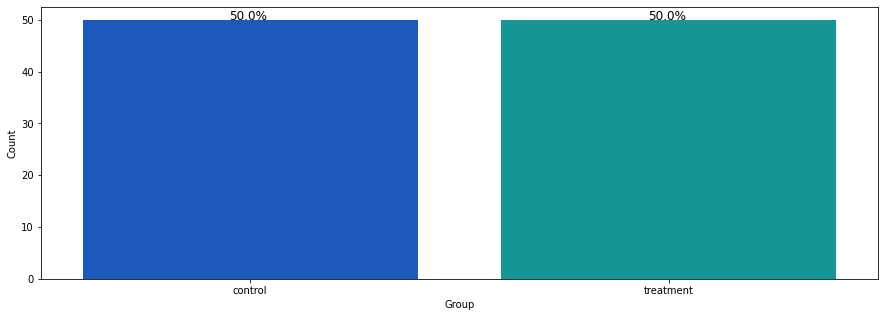

In [89]:
# Count plot for the categorical variable 'group'

plt.figure(figsize=(15,5))
ax = sns.countplot(news["group"],palette='winter')
plt.xlabel('Group')
plt.ylabel('Count')
perc_on_bar(ax,news["group"])

plt.savefig('group.png',dpi=300,bbox_inches='tight')

* There are two groups (control and treatment) with 50% users each.

### Observations on landing_page

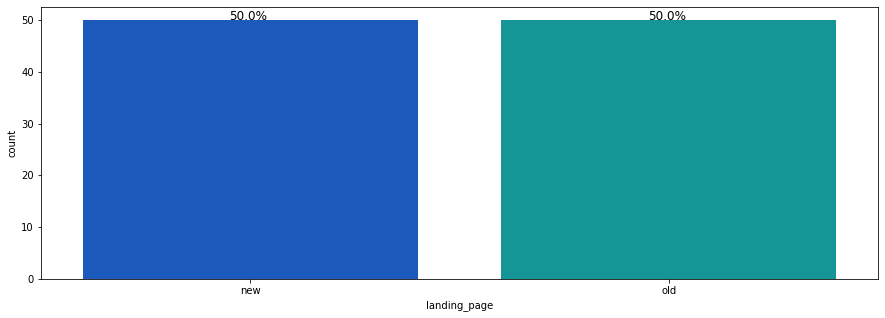

In [87]:
# Count plot for the categorical variable 'landing_page'

plt.figure(figsize=(15,5))
ax = sns.countplot(news["landing_page"],palette='winter')
perc_on_bar(ax,news["landing_page"])

plt.savefig('landing.png',dpi=300,bbox_inches='tight')

* There are also two types of landing_page (new and old) with equal number of users.

### Observations on converted

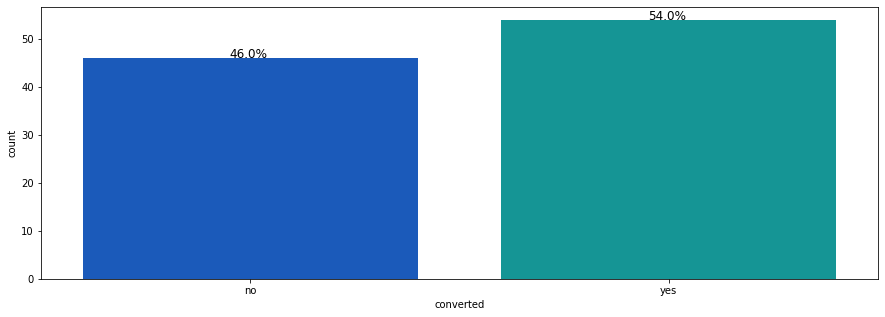

In [88]:
# Count plot for the converted status

plt.figure(figsize=(15,5))
ax = sns.countplot(news["converted"],palette='winter')
perc_on_bar(ax,news["converted"])

plt.savefig('converted.png',dpi=300,bbox_inches='tight')

* 54% of the total users were converted after visiting the company's landing page

### Observations on language_preferred

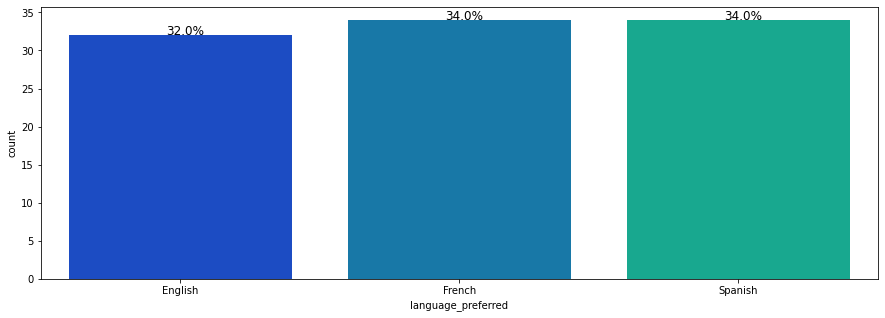

In [90]:
# Count plot for the languages prefered

plt.figure(figsize=(15,5))
ax = sns.countplot(news["language_preferred"],palette='winter')
perc_on_bar(ax,news["language_preferred"])

plt.savefig('language.png',dpi=300,bbox_inches='tight')

* French and Spanish are the two most preferred langauges taking a combined 68% (34% each) of the total users
* English is the least preferred language with 32.0% of the total users

## Bivariate Analysis

### time_spent_on_the_page vs landing_page

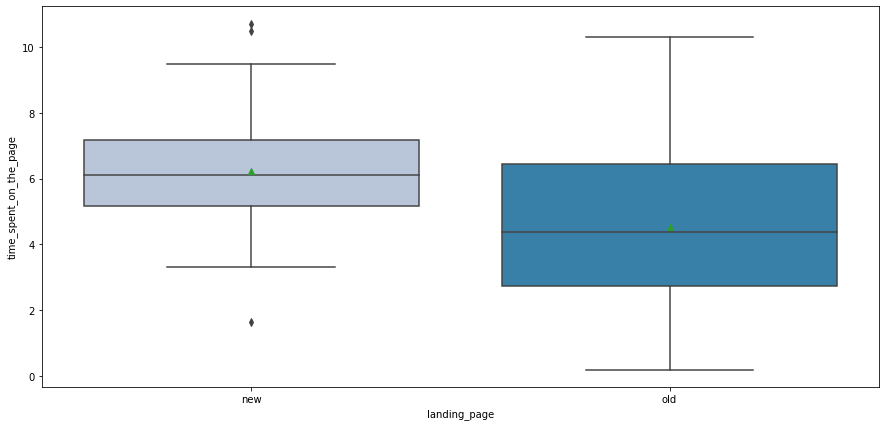

In [91]:
# A boxplot of the time spent on the page per landing page

plt.figure(figsize=(15,7))
sns.boxplot(news["landing_page"],news["time_spent_on_the_page"],palette="PuBu",showmeans=True)

plt.savefig('timeVpage.png',dpi=300,bbox_inches='tight')

plt.show()

* Users spend more time on the new landing page when compared to the old landing page
* Average time spent on the new landing page is higher than the old landing page

In [20]:
# Calculate average time on the old landing page
news["time_spent_on_the_page"][news["landing_page"] == 'old'].mean()

4.532400000000001

In [21]:
# Calculate average time on the new landing page
news["time_spent_on_the_page"][news["landing_page"] == 'new'].mean()

6.2232

### Observations on Time spent on the new landing page

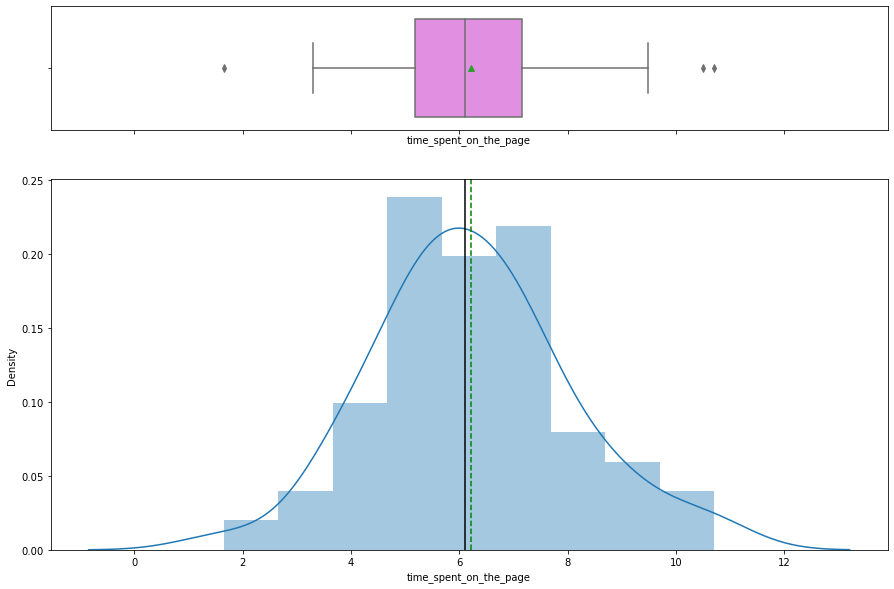

In [22]:
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = (15,10) 
                                           ) # creating the 2 subplots
sns.boxplot(news[news['landing_page'] == 'new']['time_spent_on_the_page'], ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
sns.distplot(news[news['landing_page'] == 'new']['time_spent_on_the_page'], kde=True, ax=ax_hist2) # For histogram
ax_hist2.axvline(np.mean(news[news['landing_page'] == 'new']['time_spent_on_the_page']), color='green', linestyle='--') # Add mean to the histogram
ax_hist2.axvline(np.median(news[news['landing_page'] == 'new']['time_spent_on_the_page']), color='black', linestyle='-') # Add median to the histogram

* time spent on the new landing page has a normal distribution

### Observations on Time spent on the old landing page

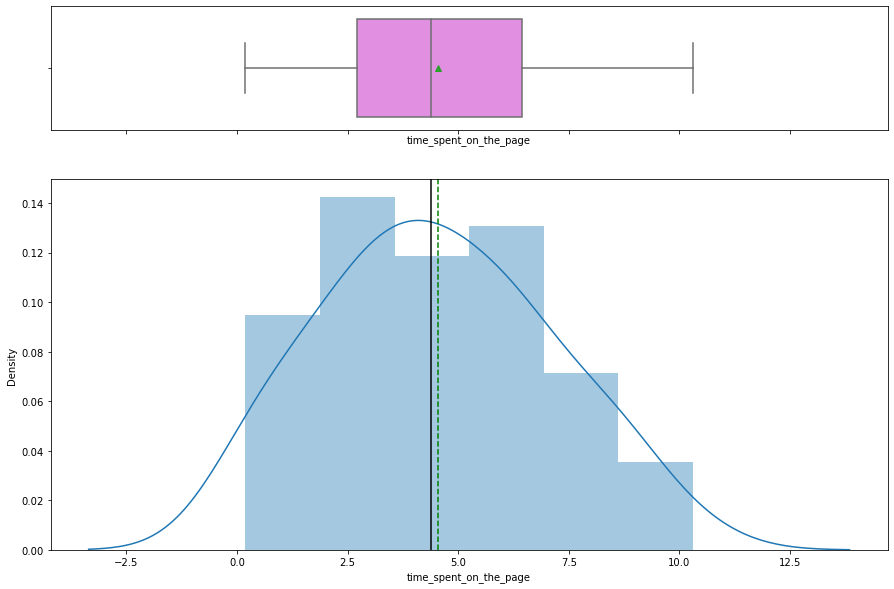

In [23]:
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = (15,10) 
                                           ) # creating the 2 subplots
sns.boxplot(news[news['landing_page'] == 'old']['time_spent_on_the_page'], ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
sns.distplot(news[news['landing_page'] == 'old']['time_spent_on_the_page'], kde=True, ax=ax_hist2) # For histogram
ax_hist2.axvline(np.mean(news[news['landing_page'] == 'old']['time_spent_on_the_page']), color='green', linestyle='--') # Add mean to the histogram
ax_hist2.axvline(np.median(news[news['landing_page'] == 'old']['time_spent_on_the_page']), color='black', linestyle='-') # Add median to the histogram

* time spent on the old landing page has a normal distribution

### time_spent_on_the_page vs converted 

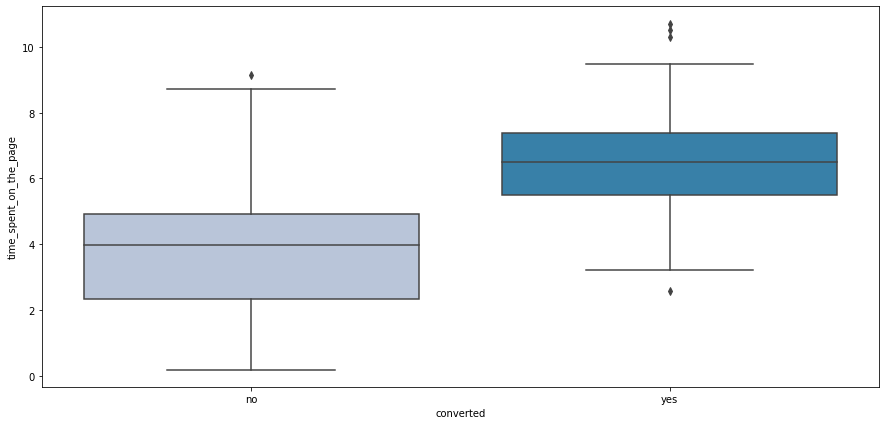

In [92]:
# A boxplot of the time spent on the page per converted status

plt.figure(figsize=(15,7))
sns.boxplot(news["converted"],news["time_spent_on_the_page"],palette="PuBu")

plt.savefig('timeVconverted.png',dpi=300,bbox_inches='tight')

plt.show()

* The average time spent on the landing page by converted users is more than that spent by users not converted.
* This could suggest that Converted users typically spend more time on the page

In [25]:
news["time_spent_on_the_page"][news["converted"] == 'yes'].mean()

6.623148148148148

In [26]:
news["time_spent_on_the_page"][news["converted"] == 'no'].mean()

3.915869565217393

### time_spent_on_the_page vs group 

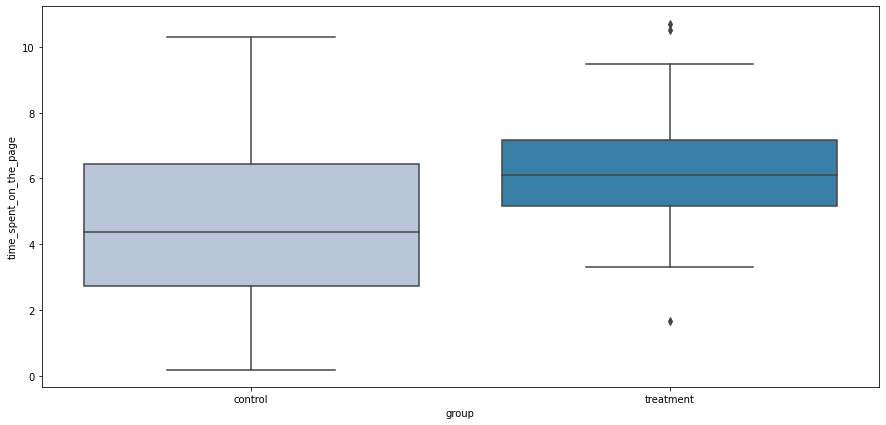

In [27]:
# A boxplot of the time spent on the page per group

plt.figure(figsize=(15,7))
sns.boxplot(news["group"],news["time_spent_on_the_page"],palette="PuBu")
plt.show()

* The treatment group spend more time on the page in comparision to the control group
* Above plot is thesame as the time_spent_on_the_page vs landing_page

### time_spent_on_the_page vs language_preferred 

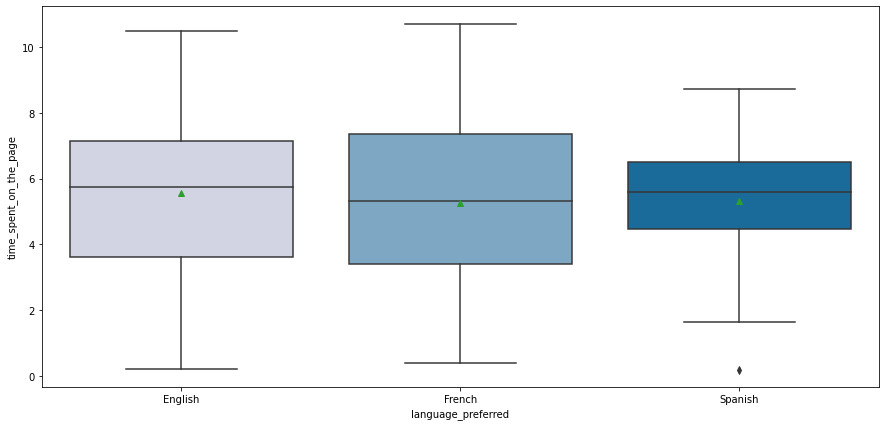

In [93]:
# A boxplot of the time spent on the page per language preferred

plt.figure(figsize=(15,7))
sns.boxplot(news["language_preferred"],news["time_spent_on_the_page"],palette="PuBu", showmeans=True)

plt.savefig('timeVlang.png',dpi=300,bbox_inches='tight')

plt.show()

* Users spend almost thesame amount of time on the landing page irrespective of the language preferred.
* The average mean of the time spent on the page for English language is the largest followed by Spanish and lastly French


In [29]:
news["time_spent_on_the_page"][news["language_preferred"] == 'English'].mean()

5.559062500000001

In [30]:
news["time_spent_on_the_page"][news["language_preferred"] == 'French'].mean()

5.253235294117649

In [31]:
news["time_spent_on_the_page"][news["language_preferred"] == 'Spanish'].mean()

5.331764705882351

### landing_page vs converted

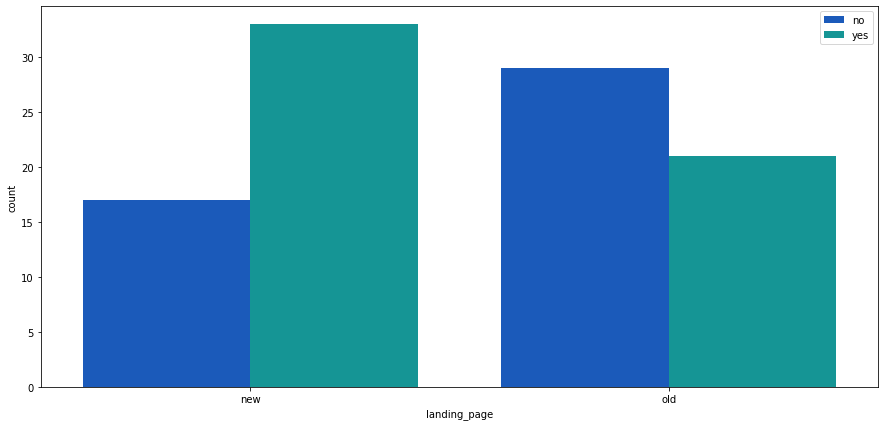

In [94]:
# A plot of the landing page per users conversion status

plt.figure(figsize=(15,7))
sns.countplot(news["landing_page"],hue=news["converted"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.savefig('pageVconvert.png',dpi=300,bbox_inches='tight')
plt.show()

* The new landing page has an higher conversion rate than the old landing page
* Most of the users that visited the new landing page were converted while for the old landing page, most of the users the page were not converted.

In [33]:
# Conversion rate for Old landing page
converted_users_old_page = news["landing_page"][(news["converted"] == 'yes') & (news["landing_page"] == 'old')].count()
total_users_old_page = news["landing_page"].value_counts()['old']

print('Conversion rate for old landing page: {}'.format(converted_users_old_page / total_users_old_page))

Conversion rate for old landing page: 0.42


In [34]:
# Conversion rate for New landing page
converted_users_new_page = news["landing_page"][(news["converted"] == 'yes') & (news["landing_page"] == 'new')].count()
total_users_new_page = news["landing_page"].value_counts()['new']

print('Conversion rate for new landing page: {}'.format(converted_users_new_page / total_users_new_page))

Conversion rate for new landing page: 0.66


### landing_page vs language_preferred

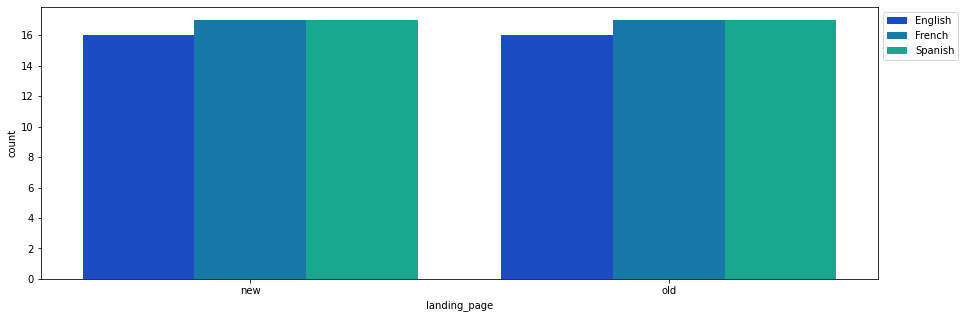

In [95]:
# A plot of the landing page per users preferred language

plt.figure(figsize=(15,5))
sns.countplot(news["landing_page"],hue=news["language_preferred"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.savefig('pageVlang.png',dpi=300,bbox_inches='tight')
plt.show()

* French and Spanish preferred users have the most and equal representation on both the new and old landing page
* English preferred users have the least representation on both the new and old landing page

### converted vs language_preferred

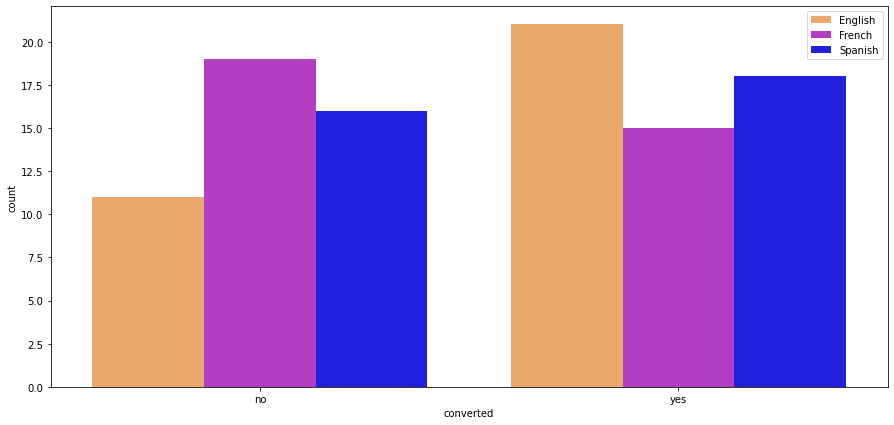

In [36]:
# A plot of the conversion status per language preferred

plt.figure(figsize=(15,7))
sns.countplot(news["converted"],hue=news["language_preferred"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Users who preferred English language are more likely to be converted than users who preferred any other language.
* Preferred language is not a good predictor of conversion status as the data are to close

## time_spent_on_the_page vs language_preferred vs converted 

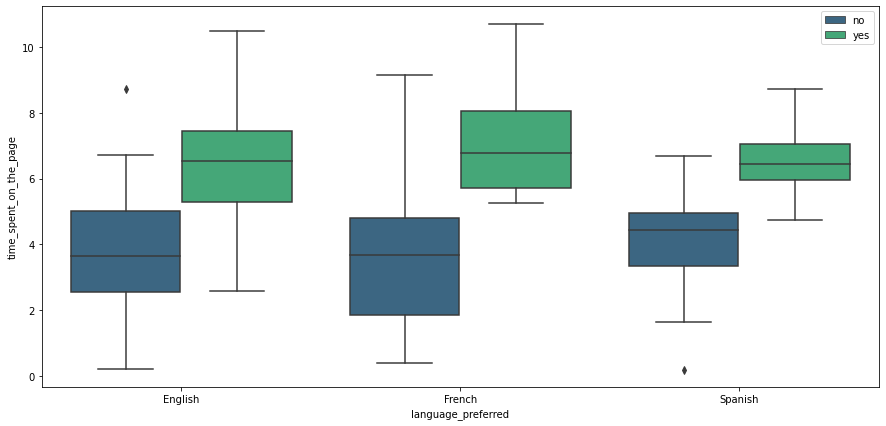

In [96]:
# A plot to show the relationship between the time spent on the page per language preferred per conversion status

plt.figure(figsize=(15,7))
sns.boxplot(news["language_preferred"],news["time_spent_on_the_page"],hue=news["converted"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))

plt.savefig('tlc.png',dpi=300,bbox_inches='tight')
plt.show()

* Converted users spend almost thesame amount of time on the landing page irrespective of the preferred language.

In [38]:
news["time_spent_on_the_page"][(news["language_preferred"] == 'English') & (news["converted"] == 'yes')].mean()

6.4747619047619045

In [39]:
news["time_spent_on_the_page"][(news["language_preferred"] == 'French') & (news["converted"] == 'yes')].mean()

7.016000000000002

In [40]:
news["time_spent_on_the_page"][(news["language_preferred"] == 'Spanish') & (news["converted"] == 'yes')].mean()

6.468888888888889

## time_spent_on_the_page vs landing_page vs language_preferred

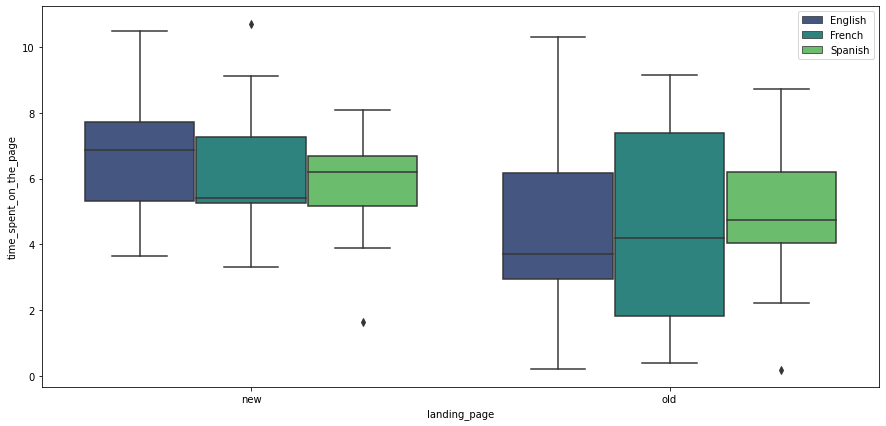

In [97]:
# A plot to show the relationship between the time spent on the page per landing page per language preferred

plt.figure(figsize=(15,7))
sns.boxplot(news["landing_page"],news["time_spent_on_the_page"],hue=news["language_preferred"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))

plt.savefig('tll.png',dpi=300,bbox_inches='tight')
plt.show()

In [42]:
news["time_spent_on_the_page"][(news["language_preferred"] == 'English') & (news["landing_page"] == 'old')].mean()

4.454375

In [43]:
news["time_spent_on_the_page"][(news["language_preferred"] == 'French') & (news["landing_page"] == 'old')].mean()

4.309999999999999

In [44]:
news["time_spent_on_the_page"][(news["language_preferred"] == 'Spanish') & (news["landing_page"] == 'old')].mean()

4.828235294117648

* Converted users spend more time on the new landing page irrespective of the preferred language. 
* The mean time spent on the old and new landing pages closely varies.

# QUESTIONS

# <a name='link1'>**1. Do the users spend more time on the new landing page than the old landing page?**</a>
Do the users spend more time on the new landing page than the old landing page? Perform the statistical analysis and visual analysis

## Statistical Analysis

### Step 1: Define null and alternate hypotheses
Let $\mu_1, \mu_2$ be the mean time spent on the new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using the Two Independent Sample T-test for Equality test - Unequal Std Dev.


### Step 3: Decide the significance level

Here, we select α= 0.05 as instructed

### Step 4: Data Preparation

### Preparing data for test

In [45]:
# Extract time spent on the old landing page
time_spent_on_old = news[news['landing_page'] == 'old']['time_spent_on_the_page']

In [46]:
# Extract time spent on the new landing page
time_spent_on_new = news[news['landing_page'] == 'new']['time_spent_on_the_page']

In [47]:
# find the sample means and sample standard deviations for the time spent on the old landing page and new landing page
print('The mean time spent on the old landing page ' + str(round(time_spent_on_old.mean(),2)))
print('The mean time spent on the new landing page ' + str(round(time_spent_on_new.mean(),2)))
print('The standard deviation of time spent on the old landing page is ' + str(round(time_spent_on_old.std(),2)))
print('The standard deviation of time spent on the new landing page ' + str(round(time_spent_on_new.std(),2)))

The mean time spent on the old landing page 4.53
The mean time spent on the new landing page 6.22
The standard deviation of time spent on the old landing page is 2.58
The standard deviation of time spent on the new landing page 1.82


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time_spent is measured on a continuous scale.
* Normally distributed populations - Yes, the time_spent distribution is normally distributed as shown in the visualization section above.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Thus! We can use two sample T-test for this problem.


### Step 5: Calculate the p-value

In [48]:
# find the p-value using two–sample t–test
test_stat, p_value = stats.ttest_ind(time_spent_on_new, time_spent_on_old, equal_var = False, alternative = 'greater')

print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [49]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7: Conclusion

Since the p-value is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that users spend more time on the new landing page than the old landing page.

## Visual Analysis

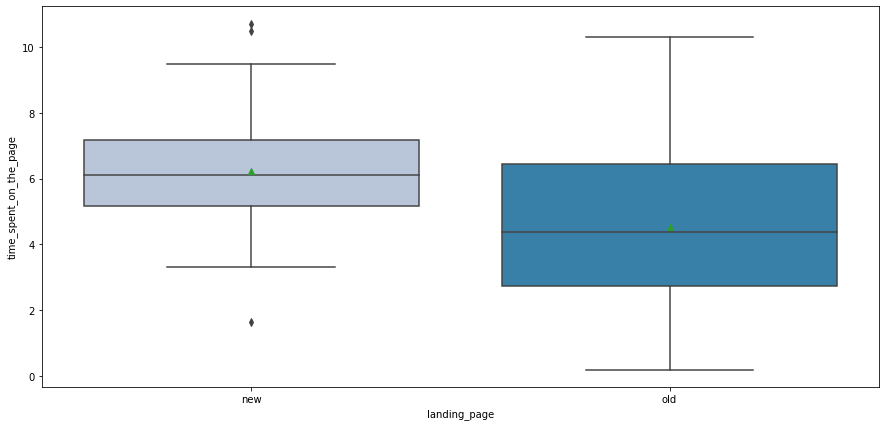

In [98]:
plt.figure(figsize=(15,7))
sns.boxplot(news["landing_page"],news["time_spent_on_the_page"],palette="PuBu",showmeans=True)

plt.savefig('q1.png',dpi=300,bbox_inches='tight')
plt.show()

**Visual analysis observation**
* Users spend more time on the new landing page than the old landing page
* The new landing page has a higher mean time spent than the old landing page

# <a name='link2'>**2. Is the conversion rate for the new page greater than the conversion rate for the old page?**</a>

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Perform the statistical analysis and visual analysis

## Statistical Analysis

### Step 1: Define null and alternate hypotheses
Let $p_1,p_2$ be the proportions of conversion rate for the new page and old page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.


### Step 3: Decide the significance level

Here, we select α= 0.05 as instructed

### Step 4: Data Preparation

### Preparing data for test

In [51]:
# number of converted users from the old landing page
converted_old_page = news[news['landing_page']=='old']['converted'].value_counts()['yes']

# number of converted users from the new landing page
converted_new_page = news[news['landing_page']=='new']['converted'].value_counts()['yes']

print('The numbers of converted users from the old and new landing pages are {0} and {1} respectively'.format(converted_old_page, converted_new_page))

# number of old landing page users in the data
n_old_page = news['landing_page'].value_counts()['old']

# number of new landing page users in the data
n_new_page = news['landing_page'].value_counts()['new']

print('The total numbers of old landing page and new landing page users are {0} and {1} respectively'.format(n_old_page, n_new_page))

The numbers of converted users from the old and new landing pages are 21 and 33 respectively
The total numbers of old landing page and new landing page users are 50 and 50 respectively


In [52]:
print(f' The proportions of converted users from the old and new landing pages are {round(21/50,2)}, {round(33/50,2)} respectively')

 The proportions of converted users from the old and new landing pages are 0.42, 0.66 respectively


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

* The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

### Step 5: Calculate the p-value

In [53]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([converted_new_page, converted_old_page], # set the counts of converted users
                                       [n_new_page,n_old_page], # set the sample sizes
                                       alternative='larger') # indicating test for larger than

# print the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [54]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Conclusion

Since the p-value is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.

## Visual Analysis

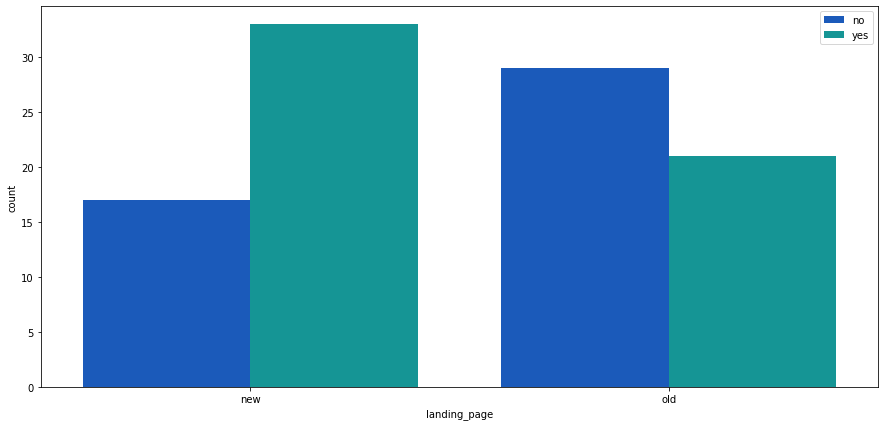

In [99]:
plt.figure(figsize=(15,7))
sns.countplot(news["landing_page"],hue=news["converted"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.savefig('q2.png',dpi=300,bbox_inches='tight')
plt.show()

**Visual analysis observation**
* Most of the users that visited the new landing page were converted while for the old landing page, most of the users the page were not converted.
* Thus, we can assume that more users are converted from the new page.

# <a name='link3'>**3. Does the converted status depend on the preferred language?**</a>

Does the converted status depend on the preferred language?
Perform the statistical analysis and visual analysis

## Statistical Analysis

### Step 1: Define null and alternate hypotheses
We will test the null hypothesis

>$H_0:$ Converted status is independent of the preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on the preferred language.

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, converted status (yes/no) and preferred language (English, French & Spanish).

### Step 3: Decide the significance level

Here, we select α= 0.05 as instructed

### Step 4: Data Preparation

### Preparing data for test

In [56]:
# Crosstab helps count the frequency of categorical data
converted_lang = pd.crosstab(index=news['converted'],columns=news['language_preferred'] )
converted_lang

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 5: Calculate the p-value

In [57]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(converted_lang)

# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [58]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Conclusion

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depend on the preferred language.

## Visual Analysis

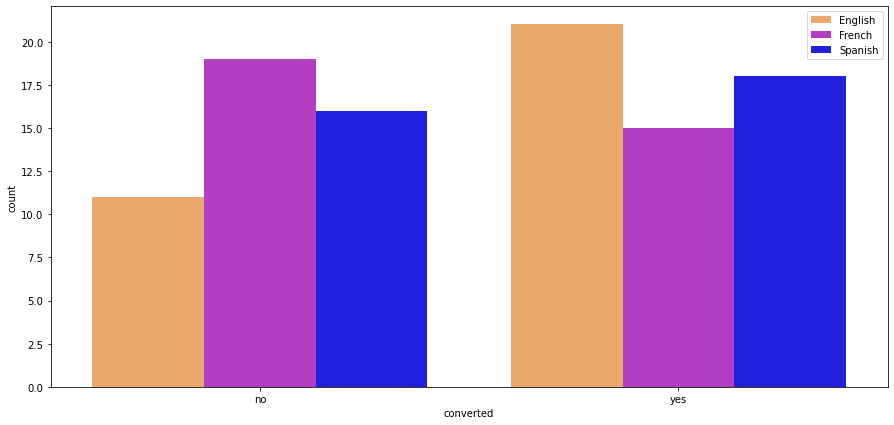

In [100]:
plt.figure(figsize=(15,7))
sns.countplot(news["converted"],hue=news["language_preferred"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))

plt.savefig('q3.png',dpi=300,bbox_inches='tight')
plt.show()

**Visual analysis observation**
* Users who preferred English language are more likely to be converted than users who preferred any other language.
* Preferred language is not a good predictor of conversion status as the data are to close

# <a name='link4'>**4. Is the mean time spent on the new page same for the different language users?**</a>

Is the mean time spent on the new page same for the different language users?
Perform the statistical analysis and visual analysis

## Statistical Analysis

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for language type English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least mean time spent on the new page for one of the language preferred is different from the rest.

### Let's have a look on the sample data

In [60]:
news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [61]:
# get the levels of languages preferred for the new page
news[news['landing_page'] == 'new']['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


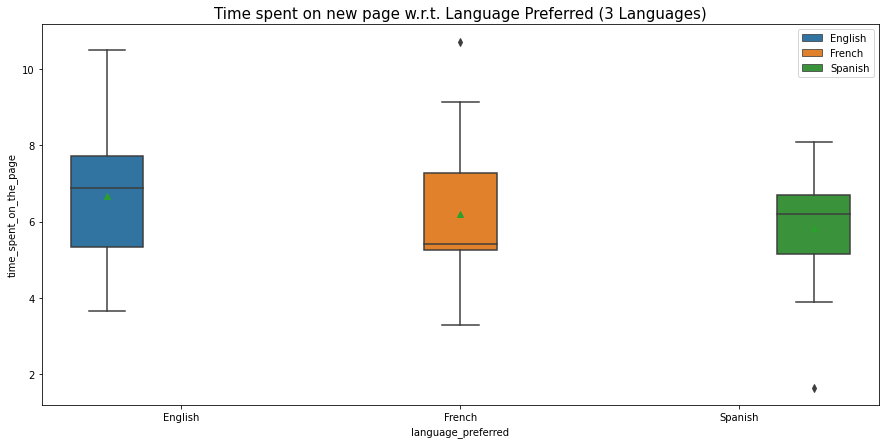

In [62]:
# mean of time spent on the new page for the different languages
print(news[news['landing_page'] == 'new'].groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (15,7))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = news[news['landing_page'] == 'new'], hue = 'language_preferred',showmeans=True)
a.set_title("Time spent on new page w.r.t. Language Preferred (3 Languages)", fontsize=15)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [63]:
# Assumption 1: Normality
# Using the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(news[news['landing_page'] == 'new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [64]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(
    news[(news['landing_page'] == 'new') & (news['language_preferred'] == 'English')]['time_spent_on_the_page'],
    news[(news['landing_page'] == 'new') & (news['language_preferred'] == 'French')]['time_spent_on_the_page'],
    news[(news['landing_page'] == 'new') & (news['language_preferred'] == 'Spanish')]['time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

Here, we select α= 0.05 as instructed

### Step 4: Collect and prepare data

In [65]:
# separate the time spent on the new page with respect to the three languages preferred
time_spent_English = news[(news['landing_page'] == 'new') & (news['language_preferred'] == 'English')]['time_spent_on_the_page']
time_spent_French = news[(news['landing_page'] == 'new') & (news['language_preferred'] == 'French')]['time_spent_on_the_page']
time_spent_Spanish = news[(news['landing_page'] == 'new') & (news['language_preferred'] == 'Spanish')]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [66]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [67]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Conclusion

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new page is the same for the different language users.

## Visual Analysis

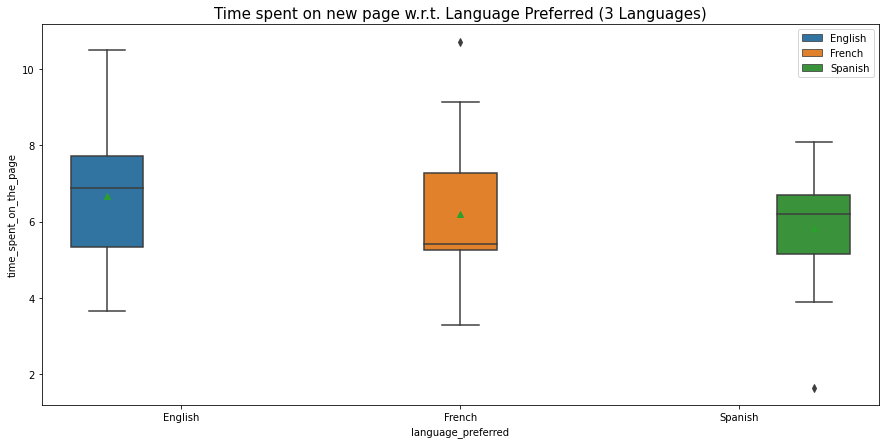

In [101]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (15,7))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = news[news['landing_page'] == 'new'], hue = 'language_preferred',showmeans=True)
a.set_title("Time spent on new page w.r.t. Language Preferred (3 Languages)", fontsize=15)
plt.legend(bbox_to_anchor=(1.00, 1))

plt.savefig('q4.png',dpi=300,bbox_inches='tight')
plt.show()

**Visual analysis observation**
* Mean time spent on the new page for the different users falls in thesame region but we can't conclude using just the visual analysis. Thus why the statistical analysis is very important.

## Conclusion

### Key insights using Exploratory Data Analysis

* There are more converted users than those not converted in the data set
* French and Spanish are the two most preferred language in the dataset.
* Users spend more time on the new landing page than the old landing page as the average time spent on the new landing page is way higher than that spent on the old landing page. 
* Converted users typically spend more time on the page than those not converted since the  average time spent on the landing page by converted users is more than that spent by users not converted.
* The new landing page has an higher conversion rate than the old landing page.
* Users spend almost thesame amount of time on the landing page irrespective of the language preferred. 
* Converted users spend almost thesame amount of time on the landing page irrespective of the language preferred.
* Converted users spend more time on the new landing page irrespective of the preferred language.
* The mean time spent on the old/new landing page closely varies across the different languages

### Hypothesis Testing
### Do the users spend more time on the new landing page than the old landing page?
Yes. We have enough statistical evidence to say that users spend more time on the new landing page than the old landing page.

### Is the conversion rate for the new page greater than the conversion rate for the old page?
Yes. We have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.

### Does the converted status depend on the preferred language?
No. We do not have enough statistical evidence to say that the converted status depend on the preferred language.

### Is the mean time spent on the new page same for the different language users?
Yes. We have enough statistical evidence to say that the mean time spent on the new page is the same for the different language users.

### Business Recommendations

* The company can expand it's business and acquire new subscribers if they implement the new landing page. 

* The company has enough number of preferred languages on the landing. Adding more languages would not automatically gurantee more subscribers. 

## THANK YOU!!!